In [375]:
#importo librerias a utilizar modules
import pandas as pd
import datetime as dt
import time as t
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import plotly.graph_objects as go
from plotly.offline import plot
from pycoingecko import CoinGeckoAPI
import seaborn as sns

In [336]:
#definimos la API como cg
cg = CoinGeckoAPI()

#compruebo si el servidor de la API está en línea y responde.
cg.ping()

{'gecko_says': '(V3) To the Moon!'}

# ETL

Filtro las primeras 10 monedas segun el Market Capital Ranking, y selecciono estas 10 para trabajar

In [337]:

coinsMktDataByCategory = cg.get_coins_markets(vs_currency='usd',
                                               order='market_cap_rank_desc',
                                               price_change_percentage= '24h,7d,30d,1y',
                                               precision=2)

# Create a DataFrame for coins market data by category
coinsMktDataByCategory_df = pd.DataFrame(coinsMktDataByCategory)

# Display the DataFrame for coins market data by category
print("\nCoins Market Data by Category:")

coinsMktDataByCategory_df = coinsMktDataByCategory_df.head(10)
coinsMktDataByCategory_df


Coins Market Data by Category:


,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,price_change_percentage_1y_in_currency,price_change_percentage_24h_in_currency,price_change_percentage_30d_in_currency,price_change_percentage_7d_in_currency
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,26039.99,506998857718,1,5.469883e+11,1.170203e+10,26206.000000,...,2021-11-10T14:24:11.849Z,67.810000,38284.70442,2013-07-06T00:00:00.000Z,None,2023-08-22T10:22:01.315Z,22.878521,0.225198,-12.934035,-11.409383
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1664.39,200048520624,2,2.000485e+11,6.245943e+09,1678.950000,...,2021-11-10T14:24:19.604Z,0.432979,384083.83520,2015-10-20T00:00:00.000Z,"{'times': 84.46179282796997, 'currency': 'btc'...",2023-08-22T10:22:03.420Z,6.292688,-0.204506,-11.235540,-9.637626
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,1.00,82848661316,3,8.284866e+10,1.138316e+10,1.003000,...,2018-07-24T00:00:00.000Z,0.572521,74.64002,2015-03-02T00:00:00.000Z,None,2023-08-22T10:20:00.530Z,-0.246481,0.034595,-0.024052,0.047232
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,209.89,32295533843,4,4.198147e+10,6.887844e+08,212.490000,...,2021-05-10T07:24:17.097Z,0.039818,526796.66798,2017-10-19T00:00:00.000Z,None,2023-08-22T10:21:56.187Z,-28.213581,-1.221764,-13.344599,-12.300669
4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.52,27363653633,5,5.178404e+10,1.158905e+09,0.528598,...,2018-01-07T00:00:00.000Z,0.002686,19159.80235,2014-05-22T00:00:00.000Z,None,2023-08-22T10:22:01.045Z,54.162627,-0.889869,-29.904204,-17.290452
5,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,1.00,25958377424,6,2.595868e+10,3.948715e+09,1.004000,...,2019-05-08T00:40:28.300Z,0.877647,13.95944,2023-03-11T08:02:13.981Z,None,2023-08-22T10:22:02.901Z,-0.086585,0.022249,0.043482,0.001145
6,staked-ether,steth,Lido Staked Ether,https://assets.coingecko.com/coins/images/1344...,1665.82,13812894457,7,1.381289e+10,1.208822e+07,1679.330000,...,2021-11-10T14:40:47.256Z,482.900000,245.01058,2020-12-22T04:08:21.854Z,None,2023-08-22T10:21:53.481Z,9.988039,-0.136582,-11.154620,-9.505997
7,cardano,ada,Cardano,https://assets.coingecko.com/coins/images/975/...,0.26,9137084500,8,1.173259e+10,1.703317e+08,0.268335,...,2021-09-02T06:00:10.474Z,0.019253,1250.66331,2020-03-13T02:22:55.044Z,None,2023-08-22T10:22:01.844Z,-41.527264,-2.063402,-17.470909,-10.115049
8,dogecoin,doge,Dogecoin,https://assets.coingecko.com/coins/images/5/la...,0.06,8847526687,9,8.847517e+09,2.988555e+08,0.063123,...,2021-05-08T05:08:23.458Z,0.000087,72243.86410,2015-05-06T00:00:00.000Z,None,2023-08-22T10:22:03.122Z,-5.195473,0.133873,-12.521414,-15.385263
9,solana,sol,Solana,https://assets.coingecko.com/coins/images/4128...,21.06,8595950443,10,1.171304e+10,3.139832e+08,21.370000,...,2021-11-06T21:54:35.825Z,0.500801,4110.05305,2020-05-11T19:35:23.449Z,None,2023-08-22T10:22:01.675Z,-38.936370,-0.495370,-14.912485,-15.793383


In [338]:
#coins by id
#coinDataFrame[coinDataFrame['id'] == 'binancecoin']
#coinDataFrame[coinDataFrame['id'] == 'bitcoin']
#coinDataFrame[coinDataFrame['id'] == 'cardano']
#coinDataFrame[coinDataFrame['id'] == 'dogecoin']
#coinDataFrame[coinDataFrame['id'] == 'ethereum']
#coinDataFrame[coinDataFrame['id'] == 'xrp']
#coinDataFrame[coinDataFrame['id'] == 'staked-ether']
# #coinDataFrame[coinDataFrame['id'] == 'solana']
# #coinDataFrame[coinDataFrame['id'] == 'tether']
# #coinDataFrame[coinDataFrame['id'] == 'usd-coin'] 

coins = ['binancecoin', 'bitcoin', 'cardano', 'dogecoin', 'ethereum', 'xrp', 'staked-ether', 'solana', 'tether', 'usd-coin']

#get list of supported VS currencies
counterCurrencies = cg.get_supported_vs_currencies()
vsCurrencies = ['usd']

#most simple price request - nested dictionary format
complexPriceRequest = cg.get_price(ids=coins, 
                        vs_currencies=vsCurrencies, 
                        include_market_cap=True,
                        include_24hr_vol=True,
                        include_24hr_change=True,
                        include_last_updated_at=True)

# Create DataFrames for the prices
complex_prices_df = pd.DataFrame(complexPriceRequest)
print("\nComplex Prices:")
complex_prices_df


Complex Prices:


,binancecoin,bitcoin,cardano,dogecoin,ethereum,solana,staked-ether,tether,usd-coin
usd,2.099000e+02,2.604000e+04,2.602320e-01,6.291200e-02,1.664390e+03,2.106000e+01,1.665820e+03,9.998510e-01,1.000000e+00
usd_market_cap,3.229553e+10,5.069989e+11,9.137084e+09,8.847527e+09,2.000485e+11,8.595950e+09,1.381289e+10,8.284866e+10,2.595838e+10
usd_24h_vol,6.888565e+08,1.170203e+10,1.703317e+08,2.988555e+08,6.245943e+09,3.139832e+08,1.208822e+07,1.138316e+10,3.948715e+09
usd_24h_change,-1.220123e+00,2.251980e-01,-2.063402e+00,1.338725e-01,-2.045065e-01,-4.953703e-01,-1.365816e-01,3.459455e-02,2.224922e-02
last_updated_at,1.692700e+09,1.692700e+09,1.692700e+09,1.692700e+09,1.692700e+09,1.692700e+09,1.692700e+09,1.692700e+09,1.692700e+09


In [339]:
#Descargamos la libreria timestamp
import time

# Obtener el timestamp actual en segundos desde el Unix Epoch
current_timestamp = int(time.time())

# Crear una estructura de tiempo para enero de 2019
target_time = time.strptime("2019-1-1", "%Y-%m-%d")
target_timestamp = int(time.mktime(target_time))

# Crear una estructura de tiempo para Dic de 2020
target_time2 = time.strptime("2020-12-31", "%Y-%m-%d")
target_timestamp2 = int(time.mktime(target_time2))

# Crear una estructura de tiempo para Dic de 2020
target_time3 = time.strptime("2023-06-30", "%Y-%m-%d")
target_timestamp3 = int(time.mktime(target_time3))

# Calcular la diferencia de tiempo en segundos
time_difference = current_timestamp - target_timestamp

print("Timestamp actual:", current_timestamp)
print("Timestamp de enero de 2019:", target_timestamp)
print("Timestamp de Diciembre de 2020:", target_timestamp2)
print("Timestamp de junio de 2023:", target_timestamp3)
print("Diferencia de tiempo en segundos:", time_difference)

Timestamp actual: 1692699726
Timestamp de enero de 2019: 1546311600
Timestamp de Diciembre de 2020: 1609383600
Timestamp de junio de 2023: 1688094000
Diferencia de tiempo en segundos: 146388126


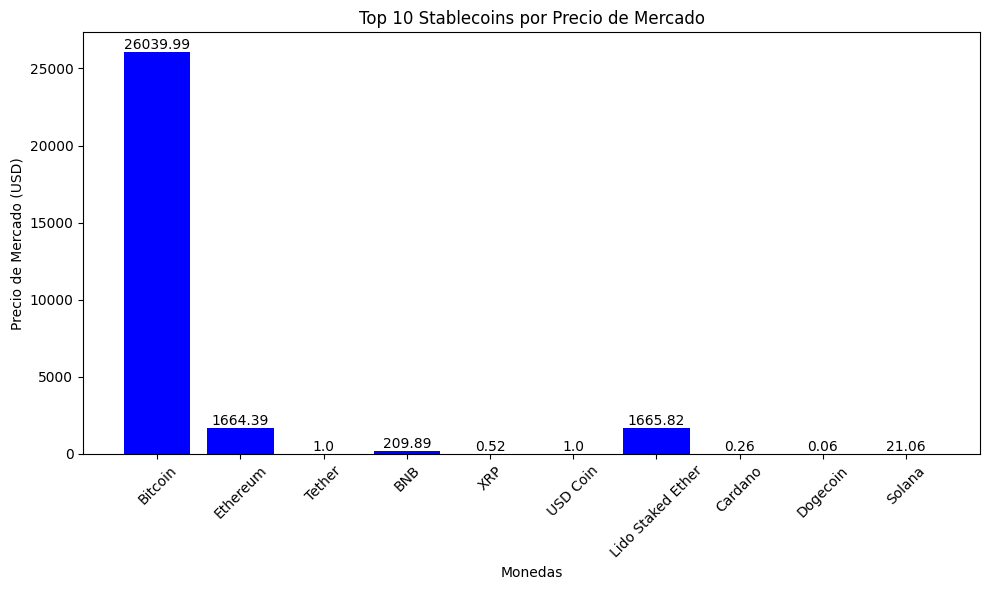

In [340]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(coinsMktDataByCategory_df['name'], coinsMktDataByCategory_df['current_price'], color='blue')
plt.xlabel('Monedas')
plt.ylabel('Precio de Mercado (USD)')
plt.title('Top 10 Stablecoins por Precio de Mercado')
plt.xticks(rotation=45)
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', fontsize=10)


# Mostrar el gráfico
plt.show()

In [341]:
#Creo dataframe para btc con el Precio, Market Cap, y 24h Volume desde Enero 2019 a Junio 2023
bitcoin = cg.get_coin_market_chart_range_by_id(id = 'bitcoin', 
                                                vs_currency='usd',
                                                from_timestamp= 1546311600, # enero 2019
                                                to_timestamp=1688094000, #Jun 2023
                                                presicion=2)
historical_btc_prices = bitcoin['prices']
historical_btc_market_caps = bitcoin['market_caps']
historical_btc_total_volumes = bitcoin['total_volumes']


token_info = cg.get_coin_by_id(id='bitcoin')
token_df = pd.DataFrame({
    'id': [token_info['id']],
    'symbol': [token_info['symbol']],
    'name': [token_info['name']]
})

# Crear un DataFrame con los datos históricos
historical_btc_df = pd.DataFrame(historical_btc_prices, columns=['timestamp', 'price'])
historical_btc_df2 = pd.DataFrame(historical_btc_market_caps, columns=['timestamp','market_caps'])
historical_btc_df3 = pd.DataFrame(historical_btc_total_volumes, columns=['timestamp','total_volumes'])

historical_btc_df['timestamp'] = pd.to_datetime(historical_btc_df['timestamp'], unit='ms')
historical_btc_df2['timestamp'] = pd.to_datetime(historical_btc_df2['timestamp'], unit='ms')
historical_btc_df3['timestamp'] = pd.to_datetime(historical_btc_df3['timestamp'], unit='ms')

# Combinar los DataFrames
combined_df_btc = historical_btc_df.merge(token_df, how='cross')
combined_df_btc2 = combined_df_btc.merge(historical_btc_df2, on='timestamp', how='inner')
combined_df_btc3 = combined_df_btc2.merge(historical_btc_df3, on='timestamp', how='inner')

# Imprimir el DataFrame resultante para chequear que funcione bien
combined_df_btc3

,timestamp,price,id,symbol,name,market_caps,total_volumes
0,2019-01-02,3794.264254,bitcoin,btc,Bitcoin,6.618845e+10,2.689878e+09
1,2019-01-03,3872.172184,bitcoin,btc,Bitcoin,6.764330e+10,3.263469e+09
2,2019-01-04,3776.525808,bitcoin,btc,Bitcoin,6.592229e+10,2.261200e+09
3,2019-01-05,3815.268080,bitcoin,btc,Bitcoin,6.665077e+10,2.950055e+09
4,2019-01-06,3787.307857,bitcoin,btc,Bitcoin,6.607097e+10,2.763832e+09
...,...,...,...,...,...,...,...
1636,2023-06-26,30454.756974,bitcoin,btc,Bitcoin,5.913877e+11,1.207682e+10
1637,2023-06-27,30285.505064,bitcoin,btc,Bitcoin,5.871343e+11,1.603218e+10
1638,2023-06-28,30693.546356,bitcoin,btc,Bitcoin,5.954272e+11,1.441185e+10
1639,2023-06-29,30083.477245,bitcoin,btc,Bitcoin,5.841877e+11,8.489428e+09


In [342]:
#Creo dataframe para ethereum con el Precio, Market Cap, y 24h Volume desde Enero 2019 a Junio 2023
ethereum = cg.get_coin_market_chart_range_by_id(id = 'ethereum', 
                                                vs_currency='usd',
                                                from_timestamp= 1546311600, # enero 2019
                                                to_timestamp=1688094000, #Jun 2023
                                                presicion=2)
historical_ethereum_prices = ethereum['prices']
historical_ethereum_market_caps = ethereum['market_caps']
historical_ethereum_total_volumes = ethereum['total_volumes']


token_info = cg.get_coin_by_id(id='ethereum')
token_df = pd.DataFrame({
    'id': [token_info['id']],
    'symbol': [token_info['symbol']],
    'name': [token_info['name']]
})

# Crear un DataFrame con los datos históricos
historical_ethereum_df = pd.DataFrame(historical_ethereum_prices, columns=['timestamp', 'price'])
historical_ethereum_df2 = pd.DataFrame(historical_ethereum_market_caps, columns=['timestamp','market_caps'])
historical_ethereum_df3 = pd.DataFrame(historical_ethereum_total_volumes, columns=['timestamp','total_volumes'])

historical_ethereum_df['timestamp'] = pd.to_datetime(historical_ethereum_df['timestamp'], unit='ms')
historical_ethereum_df2['timestamp'] = pd.to_datetime(historical_ethereum_df2['timestamp'], unit='ms')
historical_ethereum_df3['timestamp'] = pd.to_datetime(historical_ethereum_df3['timestamp'], unit='ms')

# Combinar los DataFrames
combined_df_ethereum = historical_ethereum_df.merge(token_df, how='cross')
combined_df_ethereum2 = combined_df_ethereum.merge(historical_ethereum_df2, on='timestamp', how='inner')
combined_df_ethereum3 = combined_df_ethereum2.merge(historical_ethereum_df3, on='timestamp', how='inner')

In [343]:
#Creo dataframe para tether con el Precio, Market Cap, y 24h Volume desde Enero 2019 a Junio 2023
tether = cg.get_coin_market_chart_range_by_id(id = 'tether', 
                                                vs_currency='usd',
                                                from_timestamp= 1546311600, # enero 2019
                                                to_timestamp=1688094000, #Jun 2023
                                                presicion=2)
historical_tether_prices = tether['prices']
historical_tether_market_caps = tether['market_caps']
historical_tether_total_volumes = tether['total_volumes']


token_info = cg.get_coin_by_id(id='tether')
token_df = pd.DataFrame({
    'id': [token_info['id']],
    'symbol': [token_info['symbol']],
    'name': [token_info['name']]
})

# Crear un DataFrame con los datos históricos
historical_tether_df = pd.DataFrame(historical_tether_prices, columns=['timestamp', 'price'])
historical_tether_df2 = pd.DataFrame(historical_tether_market_caps, columns=['timestamp','market_caps'])
historical_tether_df3 = pd.DataFrame(historical_tether_total_volumes, columns=['timestamp','total_volumes'])

historical_tether_df['timestamp'] = pd.to_datetime(historical_tether_df['timestamp'], unit='ms')
historical_tether_df2['timestamp'] = pd.to_datetime(historical_tether_df2['timestamp'], unit='ms')
historical_tether_df3['timestamp'] = pd.to_datetime(historical_tether_df3['timestamp'], unit='ms')

# Combinar los DataFrames
combined_df_tether = historical_tether_df.merge(token_df, how='cross')
combined_df_tether2 = combined_df_tether.merge(historical_tether_df2, on='timestamp', how='inner')
combined_df_tether3 = combined_df_tether2.merge(historical_tether_df3, on='timestamp', how='inner')

In [344]:
#Creo dataframe para binancecoin con el Precio, Market Cap, y 24h Volume desde Enero 2019 a Junio 2023
binancecoin = cg.get_coin_market_chart_range_by_id(id = 'binancecoin', 
                                                vs_currency='usd',
                                                from_timestamp= 1546311600, # enero 2019
                                                to_timestamp=1688094000, #Jun 2023
                                                presicion=2)
historical_bnb_prices = binancecoin['prices']
historical_bnb_market_caps = binancecoin['market_caps']
historical_bnb_total_volumes = binancecoin['total_volumes']


token_info = cg.get_coin_by_id(id='binancecoin')
token_df = pd.DataFrame({
    'id': [token_info['id']],
    'symbol': [token_info['symbol']],
    'name': [token_info['name']]
})

# Crear un DataFrame con los datos históricos
historical_bnb_df = pd.DataFrame(historical_bnb_prices, columns=['timestamp', 'price'])
historical_bnb_df2 = pd.DataFrame(historical_bnb_market_caps, columns=['timestamp','market_caps'])
historical_bnb_df3 = pd.DataFrame(historical_bnb_total_volumes, columns=['timestamp','total_volumes'])

historical_bnb_df['timestamp'] = pd.to_datetime(historical_bnb_df['timestamp'], unit='ms')
historical_bnb_df2['timestamp'] = pd.to_datetime(historical_bnb_df2['timestamp'], unit='ms')
historical_bnb_df3['timestamp'] = pd.to_datetime(historical_bnb_df3['timestamp'], unit='ms')

# Combinar los DataFrames
combined_df_bnb = historical_bnb_df.merge(token_df, how='cross')
combined_df_bnb2 = combined_df_bnb.merge(historical_bnb_df2, on='timestamp', how='inner')
combined_df_bnb3 = combined_df_bnb2.merge(historical_bnb_df3, on='timestamp', how='inner')

In [345]:
#Creo dataframe para xrp con el Precio, Market Cap, y 24h Volume desde Enero 2019 a Junio 2023
xrp = cg.get_coin_market_chart_range_by_id(id = 'ripple', 
                                                vs_currency='usd',
                                                from_timestamp= 1546311600, # enero 2019
                                                to_timestamp=1688094000, #Jun 2023
                                                presicion=2)
historical_xrp_prices = xrp['prices']
historical_xrp_market_caps = xrp['market_caps']
historical_xrp_total_volumes = xrp['total_volumes']


token_info = cg.get_coin_by_id(id='ripple')
token_df = pd.DataFrame({
    'id': [token_info['id']],
    'symbol': [token_info['symbol']],
    'name': [token_info['name']]
})

# Crear un DataFrame con los datos históricos
historical_xrp_df = pd.DataFrame(historical_xrp_prices, columns=['timestamp', 'price'])
historical_xrp_df2 = pd.DataFrame(historical_xrp_market_caps, columns=['timestamp','market_caps'])
historical_xrp_df3 = pd.DataFrame(historical_xrp_total_volumes, columns=['timestamp','total_volumes'])

historical_xrp_df['timestamp'] = pd.to_datetime(historical_xrp_df['timestamp'], unit='ms')
historical_xrp_df2['timestamp'] = pd.to_datetime(historical_xrp_df2['timestamp'], unit='ms')
historical_xrp_df3['timestamp'] = pd.to_datetime(historical_xrp_df3['timestamp'], unit='ms')

# Combinar los DataFrames
combined_df_xrp = historical_xrp_df.merge(token_df, how='cross')
combined_df_xrp2 = combined_df_xrp.merge(historical_xrp_df2, on='timestamp', how='inner')
combined_df_xrp3 = combined_df_xrp2.merge(historical_xrp_df3, on='timestamp', how='inner')

In [346]:
#Creo dataframe para usdcoin con el Precio, Market Cap, y 24h Volume desde Enero 2019 a Junio 2023
usdcoin = cg.get_coin_market_chart_range_by_id(id = 'usd-coin', 
                                                vs_currency='usd',
                                                from_timestamp= 1546311600, # enero 2019
                                                to_timestamp=1688094000, #Jun 2023
                                                presicion=2)
historical_usdcoin_prices = usdcoin['prices']
historical_usdcoin_market_caps = usdcoin['market_caps']
historical_usdcoin_total_volumes = usdcoin['total_volumes']


token_info = cg.get_coin_by_id(id='usd-coin')
token_df = pd.DataFrame({
    'id': [token_info['id']],
    'symbol': [token_info['symbol']],
    'name': [token_info['name']]
})

# Crear un DataFrame con los datos históricos
historical_usdcoin_df = pd.DataFrame(historical_usdcoin_prices, columns=['timestamp', 'price'])
historical_usdcoin_df2 = pd.DataFrame(historical_usdcoin_market_caps, columns=['timestamp','market_caps'])
historical_usdcoin_df3 = pd.DataFrame(historical_usdcoin_total_volumes, columns=['timestamp','total_volumes'])

historical_usdcoin_df['timestamp'] = pd.to_datetime(historical_usdcoin_df['timestamp'], unit='ms')
historical_usdcoin_df2['timestamp'] = pd.to_datetime(historical_usdcoin_df2['timestamp'], unit='ms')
historical_usdcoin_df3['timestamp'] = pd.to_datetime(historical_usdcoin_df3['timestamp'], unit='ms')

# Combinar los DataFrames
combined_df_usdcoin = historical_usdcoin_df.merge(token_df, how='cross')
combined_df_usdcoin2 = combined_df_usdcoin.merge(historical_usdcoin_df2, on='timestamp', how='inner')
combined_df_usdcoin3 = combined_df_usdcoin2.merge(historical_usdcoin_df3, on='timestamp', how='inner')

In [347]:
#Creo dataframe para staked-ether con el Precio, Market Cap, y 24h Volume desde Enero 2019 a Junio 2023
stakedether = cg.get_coin_market_chart_range_by_id(id = 'staked-ether', 
                                                vs_currency='usd',
                                                from_timestamp= 1546311600, # enero 2019
                                                to_timestamp=1688094000, #Jun 2023
                                                presicion=2)
historical_stakedether_prices = stakedether['prices']
historical_stakedether_market_caps = stakedether['market_caps']
historical_stakedether_total_volumes = stakedether['total_volumes']


token_info = cg.get_coin_by_id(id='staked-ether')
token_df = pd.DataFrame({
    'id': [token_info['id']],
    'symbol': [token_info['symbol']],
    'name': [token_info['name']]
})

# Crear un DataFrame con los datos históricos
historical_stakedether_df = pd.DataFrame(historical_stakedether_prices, columns=['timestamp', 'price'])
historical_stakedether_df2 = pd.DataFrame(historical_stakedether_market_caps, columns=['timestamp','market_caps'])
historical_stakedether_df3 = pd.DataFrame(historical_stakedether_total_volumes, columns=['timestamp','total_volumes'])

historical_stakedether_df['timestamp'] = pd.to_datetime(historical_stakedether_df['timestamp'], unit='ms')
historical_stakedether_df2['timestamp'] = pd.to_datetime(historical_stakedether_df2['timestamp'], unit='ms')
historical_stakedether_df3['timestamp'] = pd.to_datetime(historical_stakedether_df3['timestamp'], unit='ms')

# Combinar los DataFrames
combined_df_stakedether= historical_stakedether_df.merge(token_df, how='cross')
combined_df_stakedether2 = combined_df_stakedether.merge(historical_stakedether_df2, on='timestamp', how='inner')
combined_df_stakedether3 = combined_df_stakedether2.merge(historical_stakedether_df3, on='timestamp', how='inner')

In [348]:
#Creo dataframe para cardano con el Precio, Market Cap, y 24h Volume desde Enero 2019 a Junio 2023
cardano = cg.get_coin_market_chart_range_by_id(id = 'cardano', 
                                                vs_currency='usd',
                                                from_timestamp= 1546311600, # enero 2019
                                                to_timestamp=1688094000, #Jun 2023
                                                presicion=2)
historical_cardano_prices = cardano['prices']
historical_cardano_market_caps = cardano['market_caps']
historical_cardano_total_volumes = cardano['total_volumes']


token_info = cg.get_coin_by_id(id='cardano')
token_df = pd.DataFrame({
    'id': [token_info['id']],
    'symbol': [token_info['symbol']],
    'name': [token_info['name']]
})

# Crear un DataFrame con los datos históricos
historical_cardano_df = pd.DataFrame(historical_cardano_prices, columns=['timestamp', 'price'])
historical_cardano_df2 = pd.DataFrame(historical_cardano_market_caps, columns=['timestamp','market_caps'])
historical_cardano_df3 = pd.DataFrame(historical_cardano_total_volumes, columns=['timestamp','total_volumes'])

historical_cardano_df['timestamp'] = pd.to_datetime(historical_cardano_df['timestamp'], unit='ms')
historical_cardano_df2['timestamp'] = pd.to_datetime(historical_cardano_df2['timestamp'], unit='ms')
historical_cardano_df3['timestamp'] = pd.to_datetime(historical_cardano_df3['timestamp'], unit='ms')

# Combinar los DataFrames
combined_df_cardano = historical_cardano_df.merge(token_df, how='cross')
combined_df_cardano2 = combined_df_cardano.merge(historical_cardano_df2, on='timestamp', how='inner')
combined_df_cardano3 = combined_df_cardano2.merge(historical_cardano_df3, on='timestamp', how='inner')

In [349]:
#Creo dataframe para dogecoin con el Precio, Market Cap, y 24h Volume desde Enero 2019 a Junio 2023
dogecoin = cg.get_coin_market_chart_range_by_id(id = 'dogecoin', 
                                                vs_currency='usd',
                                                from_timestamp= 1546311600, # enero 2019
                                                to_timestamp=1688094000, #Jun 2023
                                                presicion=2)
historical_dogecoin_prices = dogecoin['prices']
historical_dogecoin_market_caps = dogecoin['market_caps']
historical_dogecoin_total_volumes = dogecoin['total_volumes']


token_info = cg.get_coin_by_id(id='dogecoin')
token_df = pd.DataFrame({
    'id': [token_info['id']],
    'symbol': [token_info['symbol']],
    'name': [token_info['name']]
})

# Crear un DataFrame con los datos históricos
historical_dogecoin_df = pd.DataFrame(historical_dogecoin_prices, columns=['timestamp', 'price'])
historical_dogecoin_df2 = pd.DataFrame(historical_dogecoin_market_caps, columns=['timestamp','market_caps'])
historical_dogecoin_df3 = pd.DataFrame(historical_dogecoin_total_volumes, columns=['timestamp','total_volumes'])

historical_dogecoin_df['timestamp'] = pd.to_datetime(historical_dogecoin_df['timestamp'], unit='ms')
historical_dogecoin_df2['timestamp'] = pd.to_datetime(historical_dogecoin_df2['timestamp'], unit='ms')
historical_dogecoin_df3['timestamp'] = pd.to_datetime(historical_dogecoin_df3['timestamp'], unit='ms')

# Combinar los DataFrames
combined_df_dogecoin = historical_dogecoin_df.merge(token_df, how='cross')
combined_df_dogecoin2 = combined_df_dogecoin.merge(historical_dogecoin_df2, on='timestamp', how='inner')
combined_df_dogecoin3 = combined_df_dogecoin2.merge(historical_dogecoin_df3, on='timestamp', how='inner')

In [350]:
#Creo dataframe para solana con el Precio, Market Cap, y 24h Volume desde Enero 2019 a Junio 2023
solana = cg.get_coin_market_chart_range_by_id(id = 'solana', 
                                                vs_currency='usd',
                                                from_timestamp= 1546311600, # enero 2019
                                                to_timestamp=1688094000, #Jun 2023
                                                presicion=2)
historical_solana_prices = solana['prices']
historical_solana_market_caps = solana['market_caps']
historical_solana_total_volumes = solana['total_volumes']


token_info = cg.get_coin_by_id(id='solana')
token_df = pd.DataFrame({
    'id': [token_info['id']],
    'symbol': [token_info['symbol']],
    'name': [token_info['name']]
})

# Crear un DataFrame con los datos históricos
historical_solana_df = pd.DataFrame(historical_solana_prices, columns=['timestamp', 'price'])
historical_solana_df2 = pd.DataFrame(historical_solana_market_caps, columns=['timestamp','market_caps'])
historical_solana_df3 = pd.DataFrame(historical_solana_total_volumes, columns=['timestamp','total_volumes'])

historical_solana_df['timestamp'] = pd.to_datetime(historical_solana_df['timestamp'], unit='ms')
historical_solana_df2['timestamp'] = pd.to_datetime(historical_solana_df2['timestamp'], unit='ms')
historical_solana_df3['timestamp'] = pd.to_datetime(historical_solana_df3['timestamp'], unit='ms')

# Combinar los DataFrames
combined_df_solana = historical_solana_df.merge(token_df, how='cross')
combined_df_solana2 = combined_df_solana.merge(historical_solana_df2, on='timestamp', how='inner')
combined_df_solana3 = combined_df_solana2.merge(historical_solana_df3, on='timestamp', how='inner')

Ahora uno todos los Data Frames de las 10 monedas seleccionadas previamente para trabajar con uno solo

In [351]:
#combined_df_binancecoin3
#combined_df_bitcoin3
#combined_df_cardano3
#combined_df_dogecoin3
#combined_df_ethereum3
#combined_df_xrp3
#combined_df_stakedether3
#combined_df_solana3
#combined_df_tether3
#combined_df_usdcoin3

# Concatenar verticalmente (uno debajo del otro)
df_final = pd.concat([ combined_df_bnb3,
combined_df_btc3,
combined_df_cardano3,
combined_df_dogecoin3,
combined_df_ethereum3,
combined_df_xrp3,
combined_df_solana3,
combined_df_tether3,
combined_df_usdcoin3,
combined_df_stakedether3
], ignore_index=True)


#Conveirto a Int las columnas de Market Caps y 24Hs Volume para que figure el valor real
df_final['market_caps'] = df_final['market_caps'].astype(int)
df_final['total_volumes'] = df_final['total_volumes'].astype(int)
df_final

,timestamp,price,id,symbol,name,market_caps,total_volumes
0,2019-01-02,5.987467,binancecoin,bnb,BNB,863221330,20250617
1,2019-01-03,6.057147,binancecoin,bnb,BNB,874914238,25749501
2,2019-01-04,5.800076,binancecoin,bnb,BNB,837887454,16772990
3,2019-01-05,5.967081,binancecoin,bnb,BNB,862767566,24550945
4,2019-01-06,5.913821,binancecoin,bnb,BNB,854343865,33720095
...,...,...,...,...,...,...,...
15219,2023-06-26,1898.477538,staked-ether,steth,Lido Staked Ether,14039503410,2362817
15220,2023-06-27,1858.746325,staked-ether,steth,Lido Staked Ether,13768645427,18441049
15221,2023-06-28,1888.537447,staked-ether,steth,Lido Staked Ether,14034976372,3256009
15222,2023-06-29,1828.364399,staked-ether,steth,Lido Staked Ether,13622433718,3620220


In [352]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15224 entries, 0 to 15223
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      15224 non-null  datetime64[ns]
 1   price          15224 non-null  float64       
 2   id             15224 non-null  object        
 3   symbol         15224 non-null  object        
 4   name           15224 non-null  object        
 5   market_caps    15224 non-null  int64         
 6   total_volumes  15224 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 832.7+ KB


In [353]:
#cambiamos el nombre de las columnas
df_final.rename(columns={'timestamp': 'Fecha',
                        'price': 'Precio_USD',
                        'id': 'ID',
                        'name': 'Nombre',
                        'market_caps': 'Market_Cap',
                        'total_volumes': '24h_Volume',
                        'symbol': 'Symbol',
                        }, inplace=True)

Creo un CSV con los datos finales que voy a utilizar

In [354]:

df_final.to_csv('data_cripto_final.csv', index=False)

# EDA

Comenzamos el proceso de EDA.
Las siglas de "Exploratory Data Analysis" en inglés, lo que se traduce al español como "Análisis Exploratorio de Datos". 
El objetivo principal del EDA es comprender la estructura y las características de los datos, detectar patrones, tendencias, valores atípicos y relaciones entre variables. Durante esta fase, los se pueden utilizar gráficos, tablas, estadísticas descriptivas y técnicas visuales para obtener una visión general de los datos y generar hipótesis iniciales.

Usamos Shape para saber la cantidad de Filas y Columnas

In [355]:
filas, columnas = df_final.shape
print(f"El dataframe cuenta con {columnas} columnas y {filas} filas.")

El dataframe cuenta con 7 columnas y 15224 filas.


Aqui observamos los tipos de datos de cada columna y que no existen valores nulos en ellas, siendo esto importante ya que no tenemos que tomar ninguna decision con respecto a eliminar o normalizar filas con valores nulos.

Siendo el tipo de dato de la columna Fecha: Data Type, lo cual tiene sentido;
La columna precio_USD, tiene Float64 como tipo de dato ya que son valores decimales y Market_Cap junto a 24h_Volume tienen Int como tipo de dato ya que son valores enteros, modificado anteriormente y mencionado oportunamente.

In [356]:
df_final.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15224 entries, 0 to 15223
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Fecha       15224 non-null  datetime64[ns]
 1   Precio_USD  15224 non-null  float64       
 2   ID          15224 non-null  object        
 3   Symbol      15224 non-null  object        
 4   Nombre      15224 non-null  object        
 5   Market_Cap  15224 non-null  int64         
 6   24h_Volume  15224 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 832.7+ KB


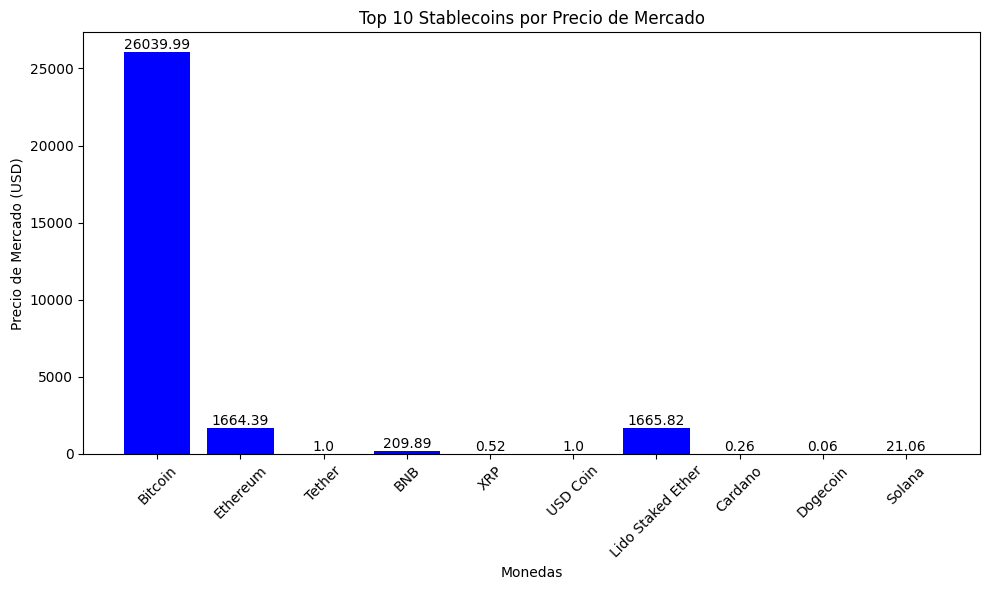

In [357]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(coinsMktDataByCategory_df['name'], coinsMktDataByCategory_df['current_price'], color='blue')
plt.xlabel('Monedas')
plt.ylabel('Precio de Mercado (USD)')
plt.title('Top 10 Stablecoins por Precio de Mercado')
plt.xticks(rotation=45)
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', fontsize=10)


# Mostrar el gráfico
plt.show()

Desarrolo codigo para saber Precios_USD Máximos y Mínimos de cada moneda.

In [358]:
# Encontrar máximos y mínimos para cada criptomoneda
max_values = df_final.groupby('ID').apply(lambda x: x.loc[x['Precio_USD'].idxmax()])
min_values = df_final.groupby('ID').apply(lambda x: x.loc[x['Precio_USD'].idxmin()])

# Crear DataFrames para los resultados
max_df = pd.DataFrame(max_values[['Fecha', 'Precio_USD']])
min_df = pd.DataFrame(min_values[['Fecha', 'Precio_USD']])

# Renombrar columnas
max_df.columns = ['Fecha_Max', 'Precio_Max']
min_df.columns = ['Fecha_Min', 'Precio_Min']

# Mostrar los resultados
print("Máximos:")
print(max_df)
print("\nMínimos:")
print(min_df)



Máximos:
              Fecha_Max    Precio_Max
ID                                   
binancecoin  2021-05-04    675.098974
bitcoin      2021-11-09  67617.015545
cardano      2021-09-04      2.967075
dogecoin     2021-05-08      0.681842
ethereum     2021-11-09   4815.004634
ripple       2021-04-15      1.837677
solana       2021-11-07    259.239558
staked-ether 2021-11-09   4775.452755
tether       2020-03-14      1.012290
usd-coin     2019-04-27      1.029960

Mínimos:
              Fecha_Min   Precio_Min
ID                                  
binancecoin  2019-01-14     5.477064
bitcoin      2019-02-08  3394.014653
cardano      2020-03-13     0.023716
dogecoin     2020-03-13     0.001483
ethereum     2019-02-08   104.265364
ripple       2020-03-13     0.137830
solana       2020-05-12     0.513923
staked-ether 2020-12-24   596.767711
tether       2020-10-22     0.981837
usd-coin     2023-03-12     0.965578


Graficamos lo anterior para verlo facilmente

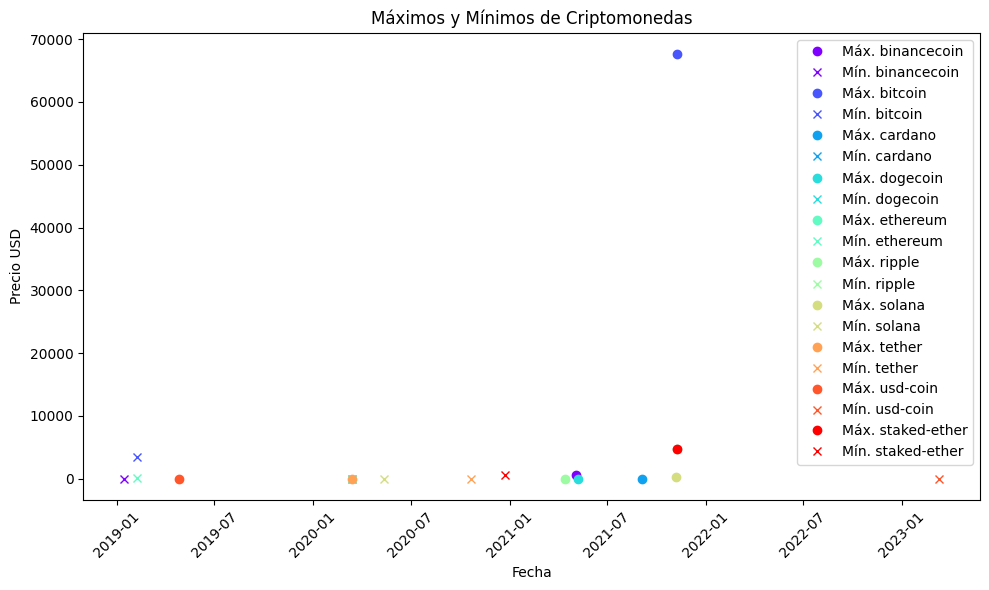

Se puede opbservar que el precio del Bitcoin toco un Máximo en Noviembre de 2021, lo cual se podría consederar como un Outliyer a primera vista, pero no lo es, el valor es real en esa fecha.


In [359]:
# Crear una figura y ejes
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Crear un diccionario de colores únicos para cada criptomoneda
cryptocurrencies = df_final['ID'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(cryptocurrencies)))

# Graficar los puntos de máximos y mínimos para cada criptomoneda
for idx, (crypto, color) in enumerate(zip(cryptocurrencies, colors)):
    crypto_max = max_df[max_df.index == crypto]
    crypto_min = min_df[min_df.index == crypto]
    ax.plot(crypto_max['Fecha_Max'], crypto_max['Precio_Max'], 'o', color=color, label=f'Máx. {crypto}')
    ax.plot(crypto_min['Fecha_Min'], crypto_min['Precio_Min'], 'x', color=color, label=f'Mín. {crypto}')

# Configurar etiquetas y título
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio USD')
ax.set_title('Máximos y Mínimos de Criptomonedas')
plt.xticks(rotation=45)
ax.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()

print('Se puede opbservar que el precio del Bitcoin toco un Máximo en Noviembre de 2021, lo cual se podría consederar como un Outliyer a primera vista, pero no lo es, el valor es real en esa fecha.')


Creo una matriz de correlacion para comparar la relación entre las variables. 

In [373]:
correlation_matrix = df_final.corr()

print(correlation_matrix)

            Precio_USD  Market_Cap  24h_Volume
Precio_USD    1.000000    0.940803    0.286758
Market_Cap    0.940803    1.000000    0.340719
24h_Volume    0.286758    0.340719    1.000000


/var/folders/rl/4_3j3kb90d74wbdrz3mdbvn00000gn/T/ipykernel_73784/2001572949.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



/var/folders/rl/4_3j3kb90d74wbdrz3mdbvn00000gn/T/ipykernel_73784/1362617882.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

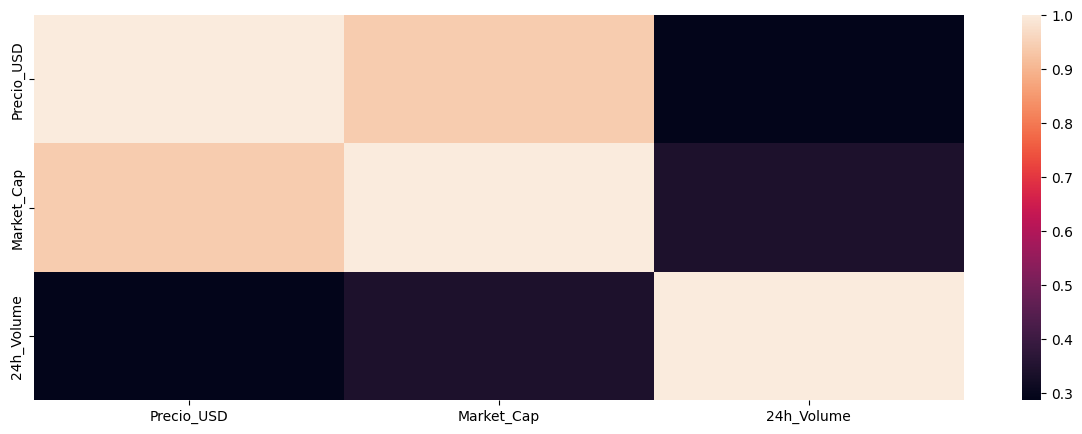

In [380]:
#graficamos la matriz
plt.figure(figsize=(15,5))
sns.heatmap(df_final.corr())

Podemos observar que existe alta relación positiva entre el Precio de Mercado y la Capitalización de Mercado

# EDA por Moneda

BTC

/var/folders/rl/4_3j3kb90d74wbdrz3mdbvn00000gn/T/ipykernel_73784/470958489.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



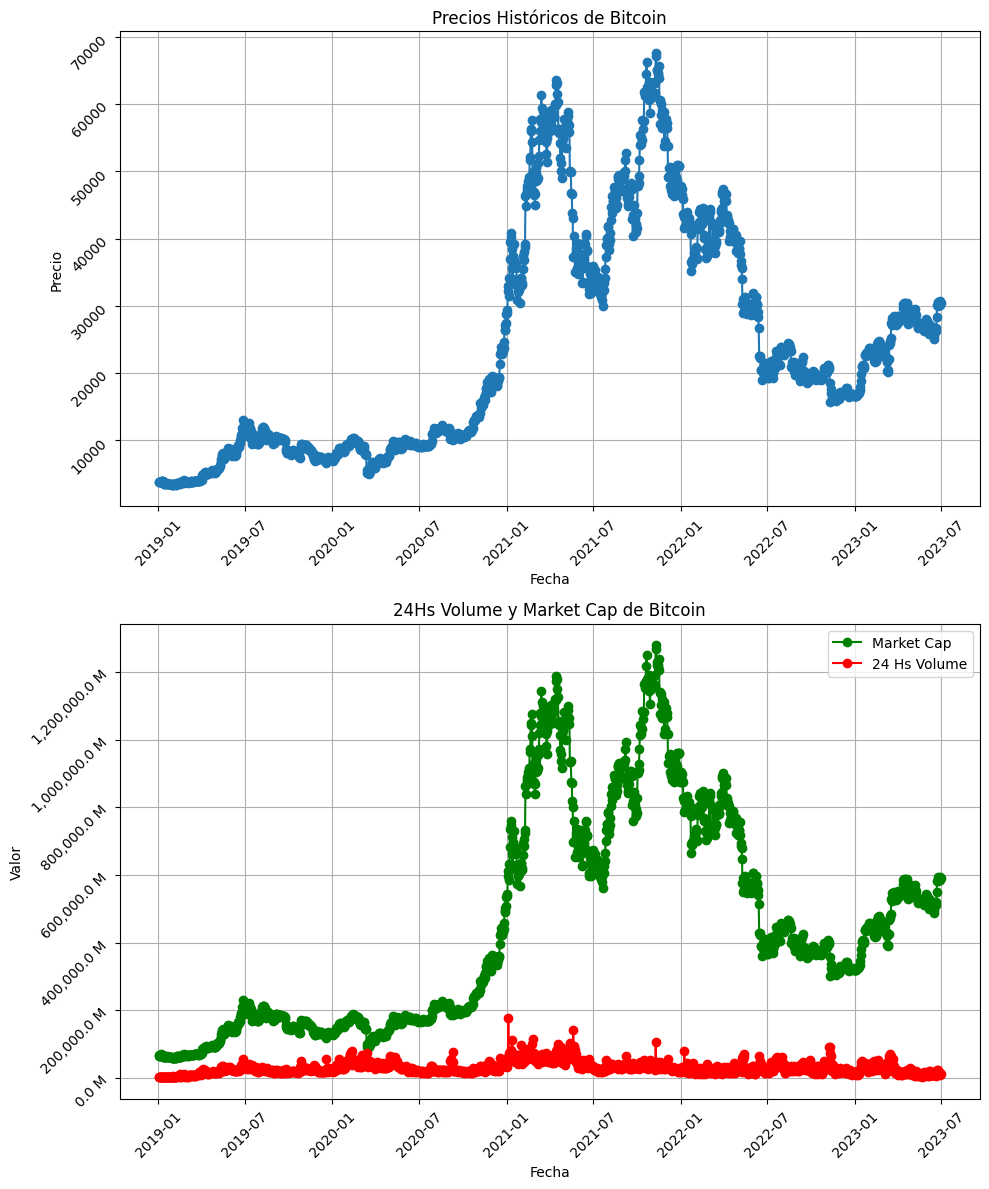

In [360]:
# Filtrar solo los datos de Bitcoin
df_bitcoin = df_final[df_final['ID'] == 'bitcoin']

# Convertir la columna de Fechas a un formato de Fecha
df_bitcoin['Fecha'] = pd.to_datetime(df_bitcoin['Fecha'])

# Ordenar los datos por Fecha
df_bitcoin = df_bitcoin.sort_values('Fecha')


# Función para formatear los valores del eje y en millones con separadores de miles
def millions_formatter(x, pos):
    'La función que formatea los valores en millones con separadores de miles'
    return f'{x / 1e6:,.1f} M'

# Crear una figura con dos subplots (2 filas, 1 columna)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Primer subplot: Precios Históricos de Bitcoin
axs[0].plot(df_bitcoin['Fecha'], df_bitcoin['Precio_USD'], marker='o')
axs[0].set_title('Precios Históricos de Bitcoin')
axs[0].set_xlabel('Fecha')
axs[0].set_ylabel('Precio')
axs[0].grid(True)
axs[0].tick_params(rotation=45)

# Segundo subplot: Precios Históricos y Market Cap de Bitcoin
axs[1].plot(df_bitcoin['Fecha'], df_bitcoin['Market_Cap'], marker='o', label='Market Cap', color='green')
axs[1].plot(df_bitcoin['Fecha'], df_bitcoin['24h_Volume'], marker='o', label='24 Hs Volume', color='red')
axs[1].set_title('24Hs Volume y Market Cap de Bitcoin')
axs[1].set_xlabel('Fecha')
axs[1].set_ylabel('Valor')
axs[1].grid(True)
axs[1].tick_params(rotation=45)


# Configurar el formateador personalizado para el eje y del segundo subplot
axs[1].yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Agregar una leyenda
plt.legend()

# Mostrar los gráficos
plt.show()


Ethereum

/var/folders/rl/4_3j3kb90d74wbdrz3mdbvn00000gn/T/ipykernel_73784/2486639447.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



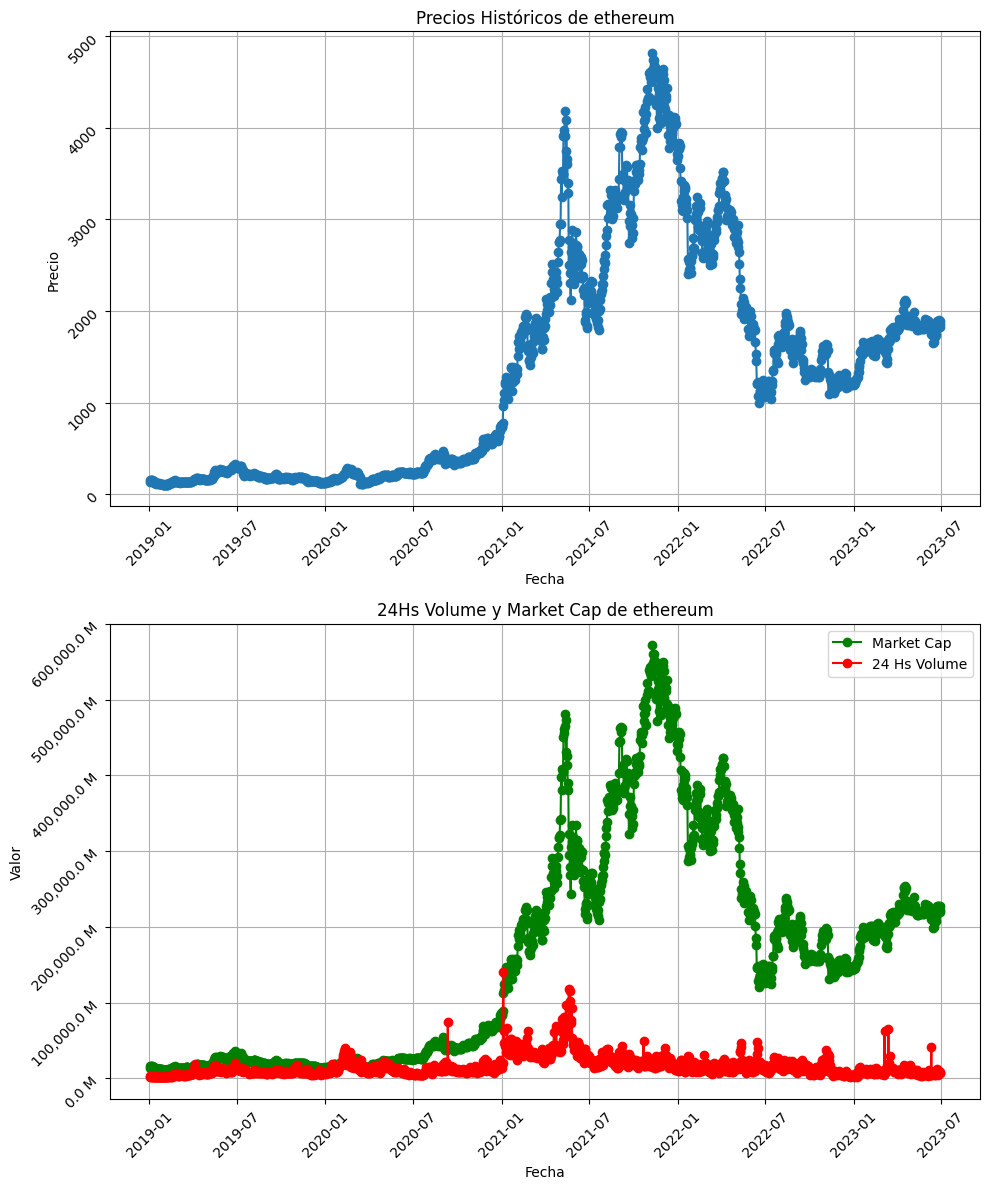

In [361]:
# Filtrar solo los datos de ethereum
df_ethereum = df_final[df_final['ID'] == 'ethereum']

# Convertir la columna de Fechas a un formato de Fecha
df_ethereum['Fecha'] = pd.to_datetime(df_ethereum['Fecha'])

# Ordenar los datos por Fecha
df_ethereum = df_ethereum.sort_values('Fecha')


# Función para formatear los valores del eje y en millones con separadores de miles
def millions_formatter(x, pos):
    'La función que formatea los valores en millones con separadores de miles'
    return f'{x / 1e6:,.1f} M'

# Crear una figura con dos subplots (2 filas, 1 columna)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Primer subplot: Precios Históricos de ethereum
axs[0].plot(df_ethereum['Fecha'], df_ethereum['Precio_USD'], marker='o')
axs[0].set_title('Precios Históricos de ethereum')
axs[0].set_xlabel('Fecha')
axs[0].set_ylabel('Precio')
axs[0].grid(True)
axs[0].tick_params(rotation=45)

# Segundo subplot: Precios Históricos y Market Cap de ethereum
axs[1].plot(df_ethereum['Fecha'], df_ethereum['Market_Cap'], marker='o', label='Market Cap', color='green')
axs[1].plot(df_ethereum['Fecha'], df_ethereum['24h_Volume'], marker='o', label='24 Hs Volume', color='red')
axs[1].set_title('24Hs Volume y Market Cap de ethereum')
axs[1].set_xlabel('Fecha')
axs[1].set_ylabel('Valor')
axs[1].grid(True)
axs[1].tick_params(rotation=45)


# Configurar el formateador personalizado para el eje y del segundo subplot
axs[1].yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Agregar una leyenda
plt.legend()

# Mostrar los gráficos
plt.show()


tether

/var/folders/rl/4_3j3kb90d74wbdrz3mdbvn00000gn/T/ipykernel_73784/1772241014.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



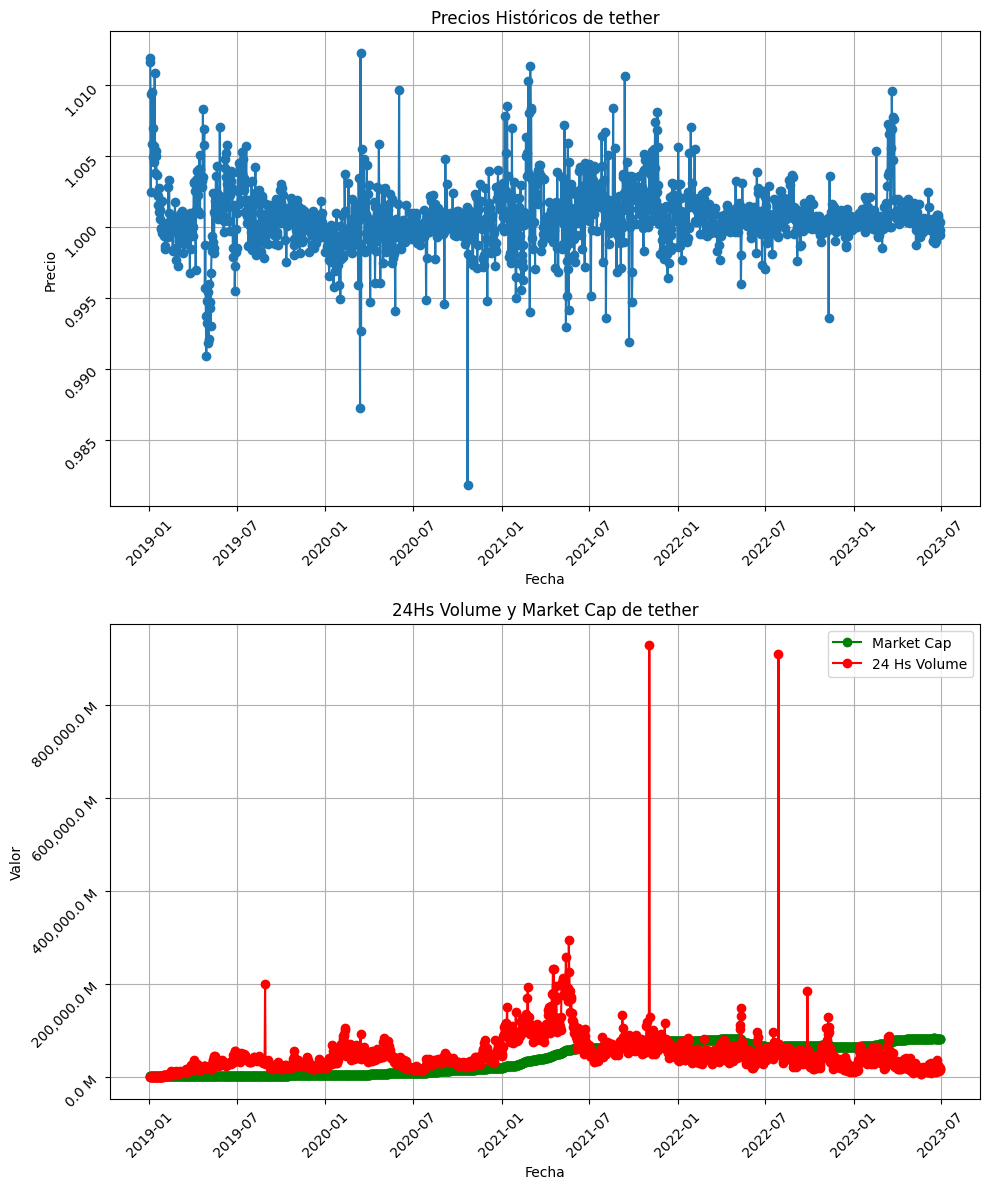

In [362]:
# Filtrar solo los datos de tether
df_tether = df_final[df_final['ID'] == 'tether']

# Convertir la columna de Fechas a un formato de Fecha
df_tether['Fecha'] = pd.to_datetime(df_tether['Fecha'])

# Ordenar los datos por Fecha
df_tether = df_tether.sort_values('Fecha')


# Función para formatear los valores del eje y en millones con separadores de miles
def millions_formatter(x, pos):
    'La función que formatea los valores en millones con separadores de miles'
    return f'{x / 1e6:,.1f} M'

# Crear una figura con dos subplots (2 filas, 1 columna)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Primer subplot: Precios Históricos de tether
axs[0].plot(df_tether['Fecha'], df_tether['Precio_USD'], marker='o')
axs[0].set_title('Precios Históricos de tether')
axs[0].set_xlabel('Fecha')
axs[0].set_ylabel('Precio')
axs[0].grid(True)
axs[0].tick_params(rotation=45)

# Segundo subplot: Precios Históricos y Market Cap de tether
axs[1].plot(df_tether['Fecha'], df_tether['Market_Cap'], marker='o', label='Market Cap', color='green')
axs[1].plot(df_tether['Fecha'], df_tether['24h_Volume'], marker='o', label='24 Hs Volume', color='red')
axs[1].set_title('24Hs Volume y Market Cap de tether')
axs[1].set_xlabel('Fecha')
axs[1].set_ylabel('Valor')
axs[1].grid(True)
axs[1].tick_params(rotation=45)


# Configurar el formateador personalizado para el eje y del segundo subplot
axs[1].yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Agregar una leyenda
plt.legend()

# Mostrar los gráficos
plt.show()


Binance Coin

/var/folders/rl/4_3j3kb90d74wbdrz3mdbvn00000gn/T/ipykernel_73784/2388335352.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



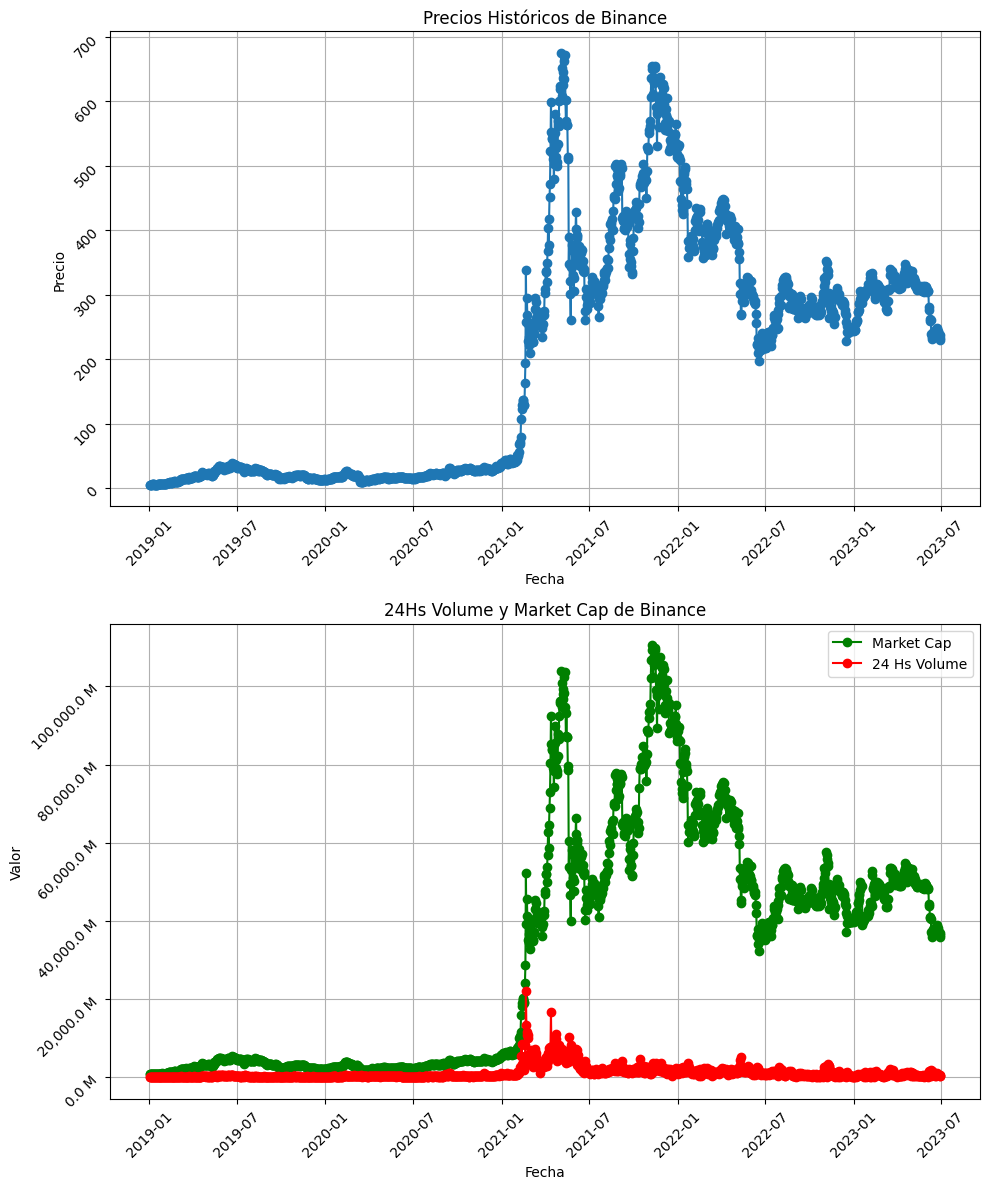

In [363]:
# Filtrar solo los datos de Binance
df_binance = df_final[df_final['ID'] == 'binancecoin']

# Convertir la columna de Fechas a un formato de Fecha
df_binance['Fecha'] = pd.to_datetime(df_binance['Fecha'])

# Ordenar los datos por Fecha
df_binance = df_binance.sort_values('Fecha')


# Función para formatear los valores del eje y en millones con separadores de miles
def millions_formatter(x, pos):
    'La función que formatea los valores en millones con separadores de miles'
    return f'{x / 1e6:,.1f} M'

# Crear una figura con dos subplots (2 filas, 1 columna)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Primer subplot: Precios Históricos de Binance
axs[0].plot(df_binance['Fecha'], df_binance['Precio_USD'], marker='o')
axs[0].set_title('Precios Históricos de Binance')
axs[0].set_xlabel('Fecha')
axs[0].set_ylabel('Precio')
axs[0].grid(True)
axs[0].tick_params(rotation=45)

# Segundo subplot: Precios Históricos y Market Cap de Binance
axs[1].plot(df_binance['Fecha'], df_binance['Market_Cap'], marker='o', label='Market Cap', color='green')
axs[1].plot(df_binance['Fecha'], df_binance['24h_Volume'], marker='o', label='24 Hs Volume', color='red')
axs[1].set_title('24Hs Volume y Market Cap de Binance')
axs[1].set_xlabel('Fecha')
axs[1].set_ylabel('Valor')
axs[1].grid(True)
axs[1].tick_params(rotation=45)


# Configurar el formateador personalizado para el eje y del segundo subplot
axs[1].yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Agregar una leyenda
plt.legend()

# Mostrar los gráficos
plt.show()


XRP

/var/folders/rl/4_3j3kb90d74wbdrz3mdbvn00000gn/T/ipykernel_73784/4236215380.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



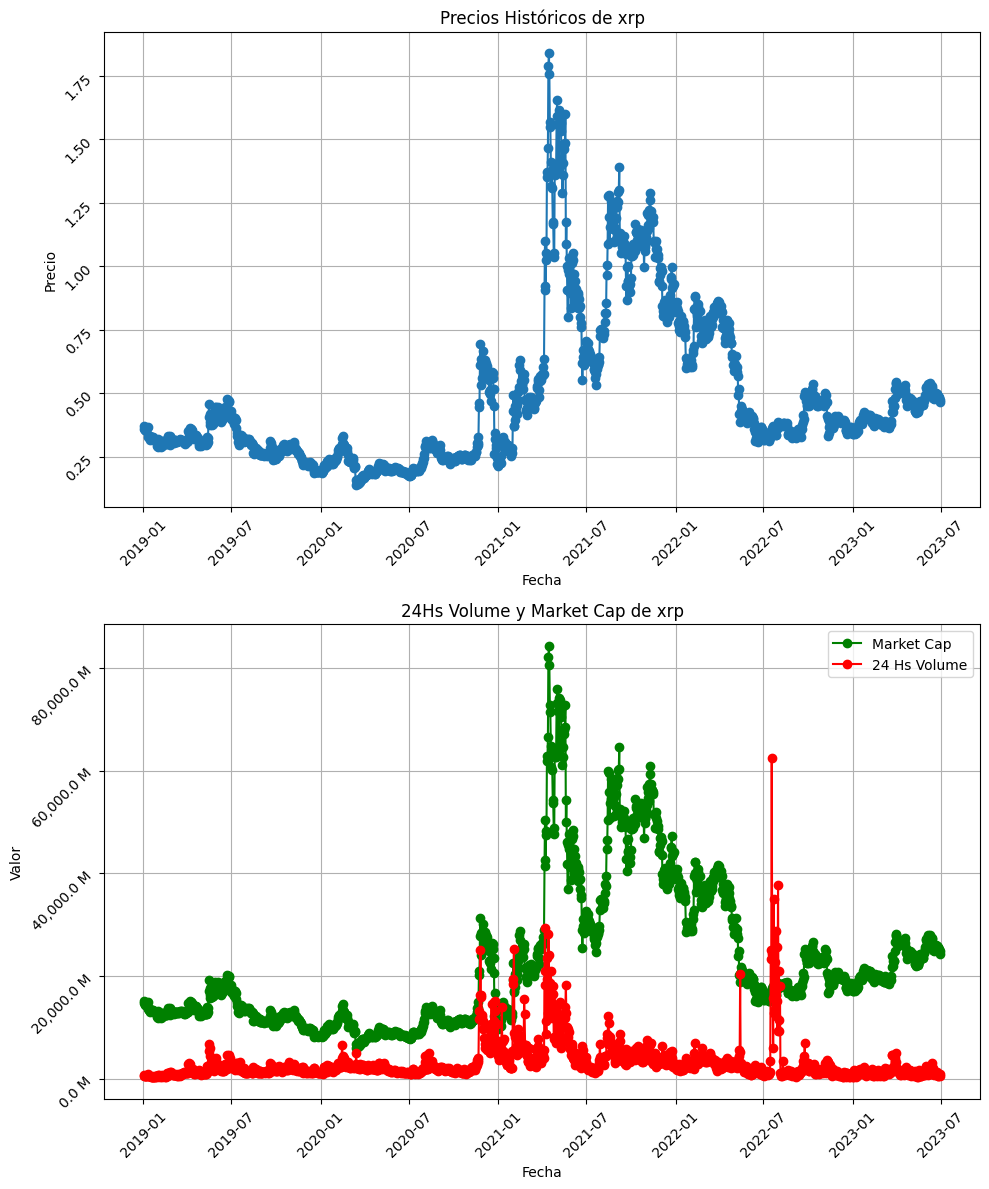

In [364]:
# Filtrar solo los datos de xrp
df_xrp = df_final[df_final['ID'] == 'ripple']

# Convertir la columna de Fechas a un formato de Fecha
df_xrp['Fecha'] = pd.to_datetime(df_xrp['Fecha'])

# Ordenar los datos por Fecha
df_xrp = df_xrp.sort_values('Fecha')


# Función para formatear los valores del eje y en millones con separadores de miles
def millions_formatter(x, pos):
    'La función que formatea los valores en millones con separadores de miles'
    return f'{x / 1e6:,.1f} M'

# Crear una figura con dos subplots (2 filas, 1 columna)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Primer subplot: Precios Históricos de xrp
axs[0].plot(df_xrp['Fecha'], df_xrp['Precio_USD'], marker='o')
axs[0].set_title('Precios Históricos de xrp')
axs[0].set_xlabel('Fecha')
axs[0].set_ylabel('Precio')
axs[0].grid(True)
axs[0].tick_params(rotation=45)

# Segundo subplot: Precios Históricos y Market Cap de xrp
axs[1].plot(df_xrp['Fecha'], df_xrp['Market_Cap'], marker='o', label='Market Cap', color='green')
axs[1].plot(df_xrp['Fecha'], df_xrp['24h_Volume'], marker='o', label='24 Hs Volume', color='red')
axs[1].set_title('24Hs Volume y Market Cap de xrp')
axs[1].set_xlabel('Fecha')
axs[1].set_ylabel('Valor')
axs[1].grid(True)
axs[1].tick_params(rotation=45)


# Configurar el formateador personalizado para el eje y del segundo subplot
axs[1].yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Agregar una leyenda
plt.legend()

# Mostrar los gráficos
plt.show()

USD Coin

/var/folders/rl/4_3j3kb90d74wbdrz3mdbvn00000gn/T/ipykernel_73784/2794349405.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



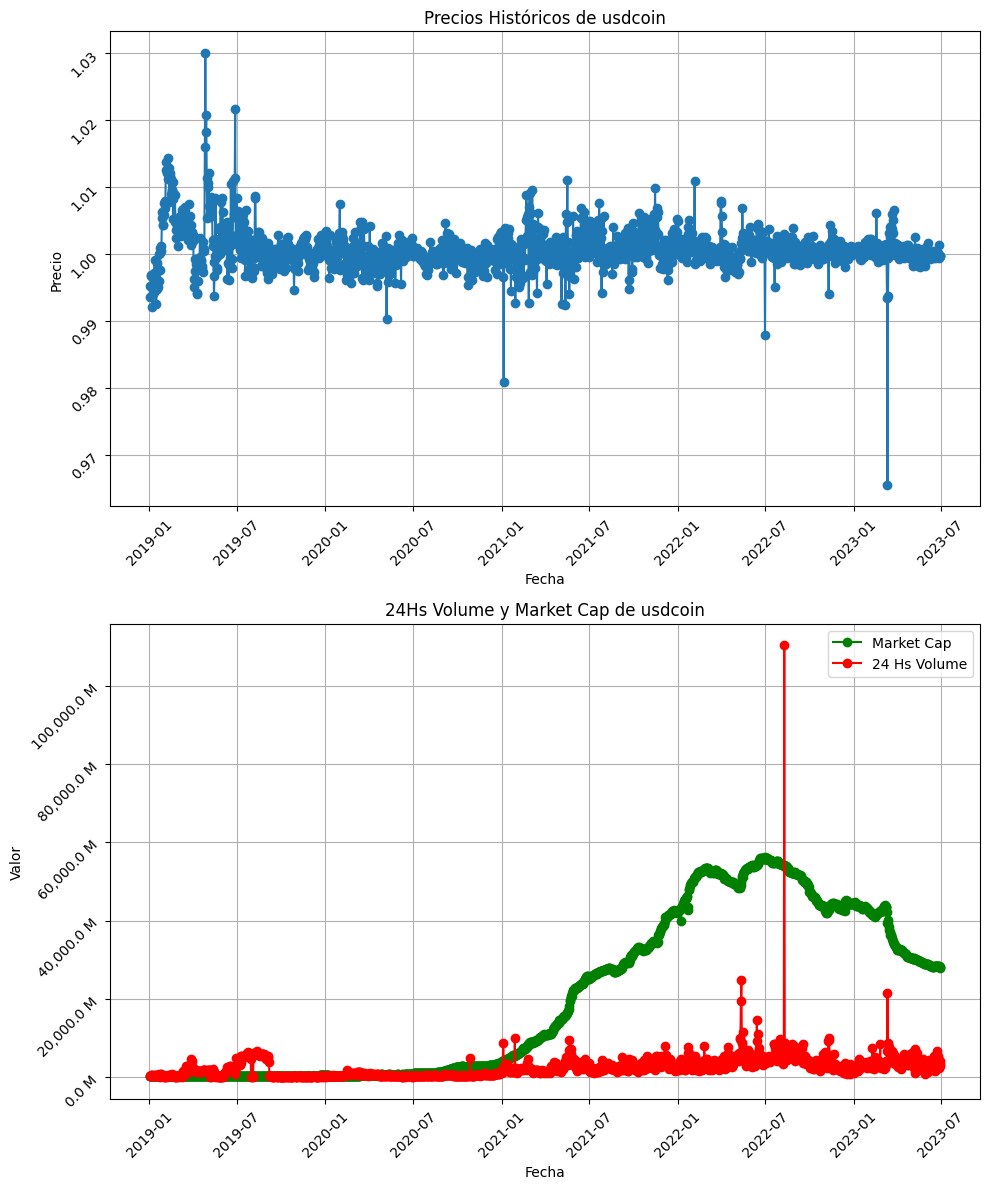

In [365]:
# Filtrar solo los datos de usdcoin
df_usdcoin = df_final[df_final['ID'] == 'usd-coin']

# Convertir la columna de Fechas a un formato de Fecha
df_usdcoin['Fecha'] = pd.to_datetime(df_usdcoin['Fecha'])

# Ordenar los datos por Fecha
df_usdcoin = df_usdcoin.sort_values('Fecha')


# Función para formatear los valores del eje y en millones con separadores de miles
def millions_formatter(x, pos):
    'La función que formatea los valores en millones con separadores de miles'
    return f'{x / 1e6:,.1f} M'

# Crear una figura con dos subplots (2 filas, 1 columna)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Primer subplot: Precios Históricos de usdcoin
axs[0].plot(df_usdcoin['Fecha'], df_usdcoin['Precio_USD'], marker='o')
axs[0].set_title('Precios Históricos de usdcoin')
axs[0].set_xlabel('Fecha')
axs[0].set_ylabel('Precio')
axs[0].grid(True)
axs[0].tick_params(rotation=45)

# Segundo subplot: Precios Históricos y Market Cap de usdcoin
axs[1].plot(df_usdcoin['Fecha'], df_usdcoin['Market_Cap'], marker='o', label='Market Cap', color='green')
axs[1].plot(df_usdcoin['Fecha'], df_usdcoin['24h_Volume'], marker='o', label='24 Hs Volume', color='red')
axs[1].set_title('24Hs Volume y Market Cap de usdcoin')
axs[1].set_xlabel('Fecha')
axs[1].set_ylabel('Valor')
axs[1].grid(True)
axs[1].tick_params(rotation=45)


# Configurar el formateador personalizado para el eje y del segundo subplot
axs[1].yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Agregar una leyenda
plt.legend()

# Mostrar los gráficos
plt.show()

staked-ether

/var/folders/rl/4_3j3kb90d74wbdrz3mdbvn00000gn/T/ipykernel_73784/916749289.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



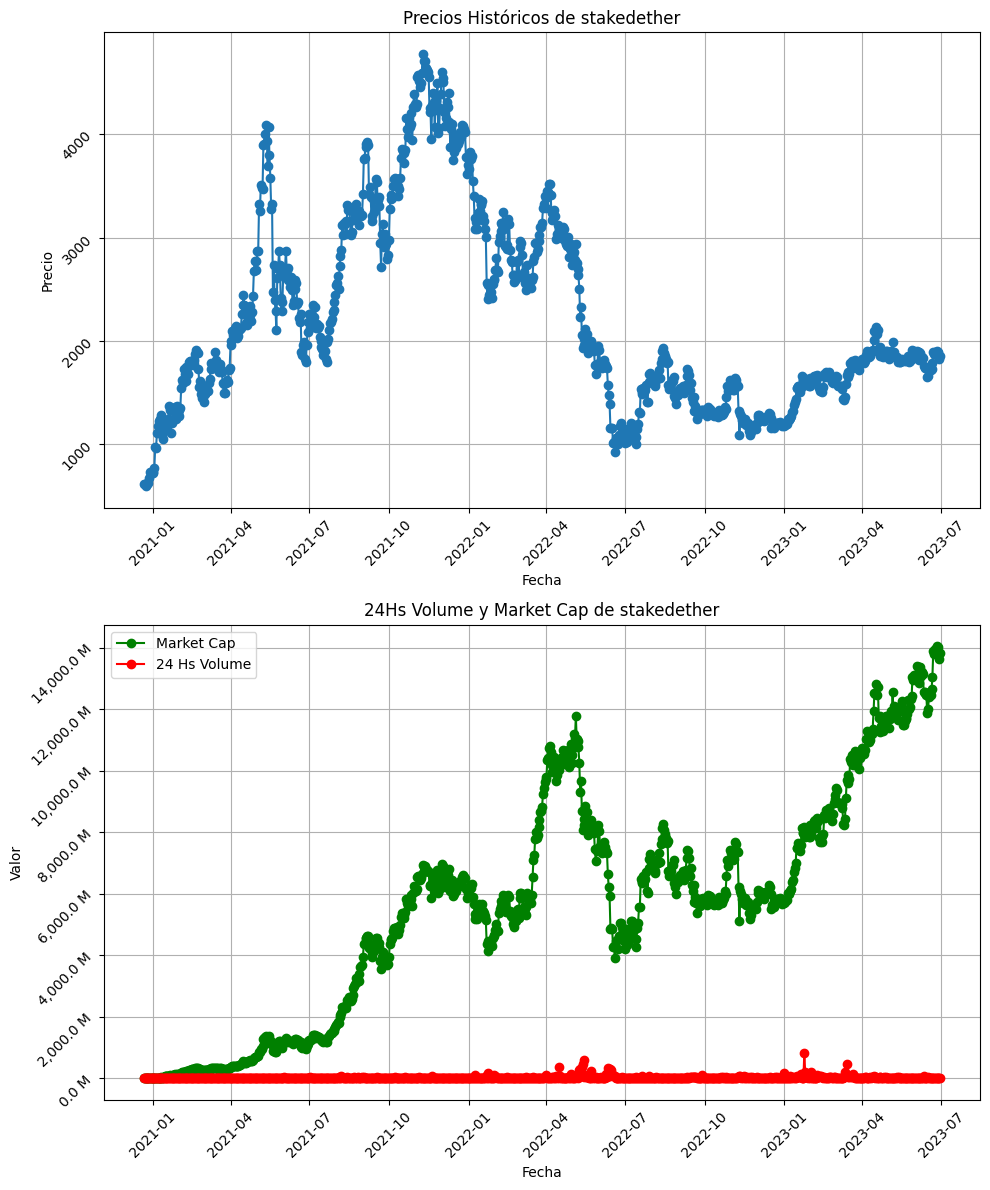

In [367]:
# Filtrar solo los datos de stakedether
df_stakedether = df_final[df_final['ID'] == 'staked-ether']

# Convertir la columna de Fechas a un formato de Fecha
df_stakedether['Fecha'] = pd.to_datetime(df_stakedether['Fecha'])

# Ordenar los datos por Fecha
df_stakedether = df_stakedether.sort_values('Fecha')


# Función para formatear los valores del eje y en millones con separadores de miles
def millions_formatter(x, pos):
    'La función que formatea los valores en millones con separadores de miles'
    return f'{x / 1e6:,.1f} M'

# Crear una figura con dos subplots (2 filas, 1 columna)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Primer subplot: Precios Históricos de stakedether
axs[0].plot(df_stakedether['Fecha'], df_stakedether['Precio_USD'], marker='o')
axs[0].set_title('Precios Históricos de stakedether')
axs[0].set_xlabel('Fecha')
axs[0].set_ylabel('Precio')
axs[0].grid(True)
axs[0].tick_params(rotation=45)

# Segundo subplot: Precios Históricos y Market Cap de stakedether
axs[1].plot(df_stakedether['Fecha'], df_stakedether['Market_Cap'], marker='o', label='Market Cap', color='green')
axs[1].plot(df_stakedether['Fecha'], df_stakedether['24h_Volume'], marker='o', label='24 Hs Volume', color='red')
axs[1].set_title('24Hs Volume y Market Cap de stakedether')
axs[1].set_xlabel('Fecha')
axs[1].set_ylabel('Valor')
axs[1].grid(True)
axs[1].tick_params(rotation=45)


# Configurar el formateador personalizado para el eje y del segundo subplot
axs[1].yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Agregar una leyenda
plt.legend()

# Mostrar los gráficos
plt.show()

cardano

/var/folders/rl/4_3j3kb90d74wbdrz3mdbvn00000gn/T/ipykernel_73784/1808760377.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



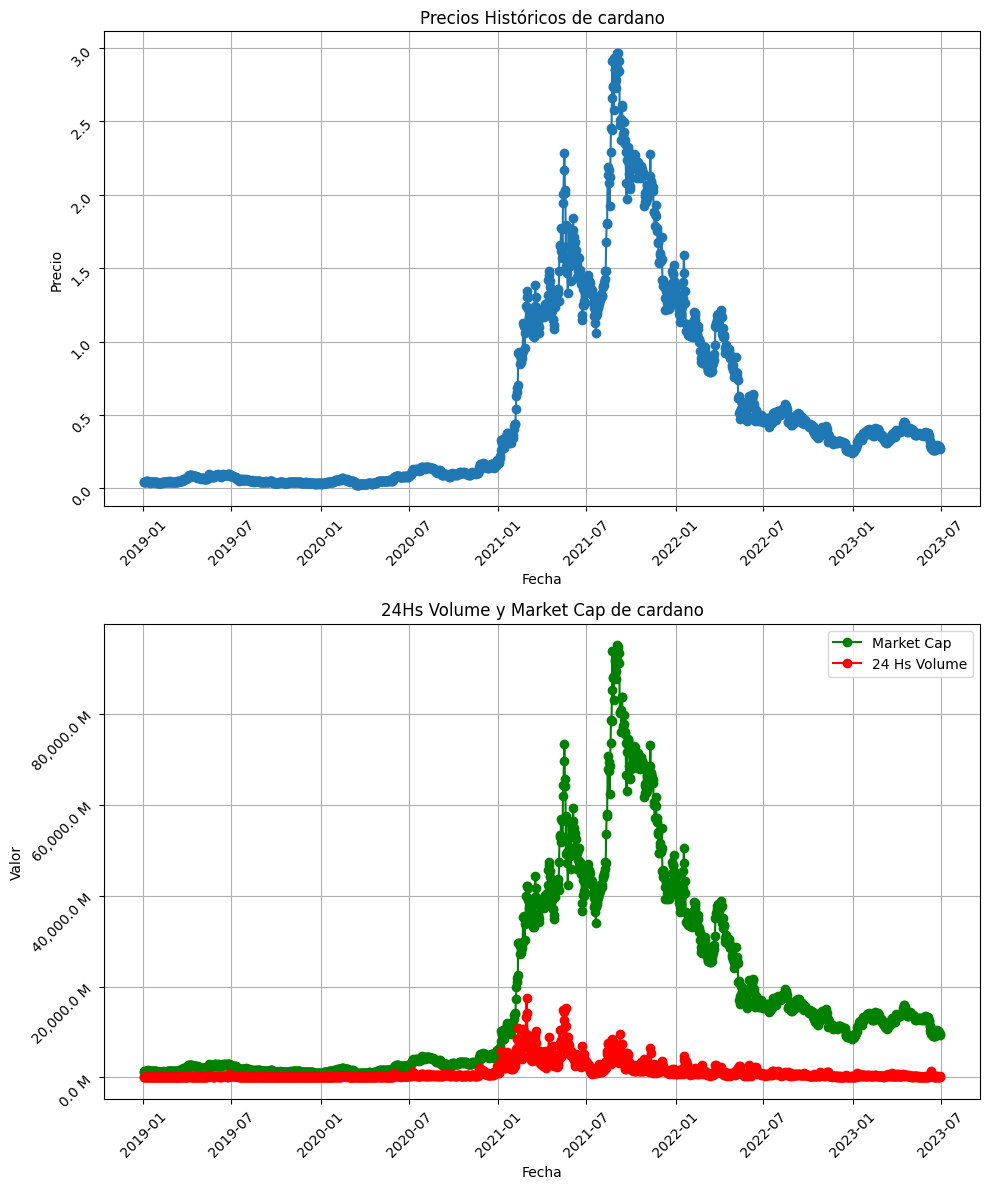

In [368]:
# Filtrar solo los datos de cardano
df_cardano = df_final[df_final['ID'] == 'cardano']

# Convertir la columna de Fechas a un formato de Fecha
df_cardano['Fecha'] = pd.to_datetime(df_cardano['Fecha'])

# Ordenar los datos por Fecha
df_cardano = df_cardano.sort_values('Fecha')


# Función para formatear los valores del eje y en millones con separadores de miles
def millions_formatter(x, pos):
    'La función que formatea los valores en millones con separadores de miles'
    return f'{x / 1e6:,.1f} M'

# Crear una figura con dos subplots (2 filas, 1 columna)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Primer subplot: Precios Históricos de cardano
axs[0].plot(df_cardano['Fecha'], df_cardano['Precio_USD'], marker='o')
axs[0].set_title('Precios Históricos de cardano')
axs[0].set_xlabel('Fecha')
axs[0].set_ylabel('Precio')
axs[0].grid(True)
axs[0].tick_params(rotation=45)

# Segundo subplot: Precios Históricos y Market Cap de cardano
axs[1].plot(df_cardano['Fecha'], df_cardano['Market_Cap'], marker='o', label='Market Cap', color='green')
axs[1].plot(df_cardano['Fecha'], df_cardano['24h_Volume'], marker='o', label='24 Hs Volume', color='red')
axs[1].set_title('24Hs Volume y Market Cap de cardano')
axs[1].set_xlabel('Fecha')
axs[1].set_ylabel('Valor')
axs[1].grid(True)
axs[1].tick_params(rotation=45)


# Configurar el formateador personalizado para el eje y del segundo subplot
axs[1].yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Agregar una leyenda
plt.legend()

# Mostrar los gráficos
plt.show()

dodgecoin

/var/folders/rl/4_3j3kb90d74wbdrz3mdbvn00000gn/T/ipykernel_73784/3061972627.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



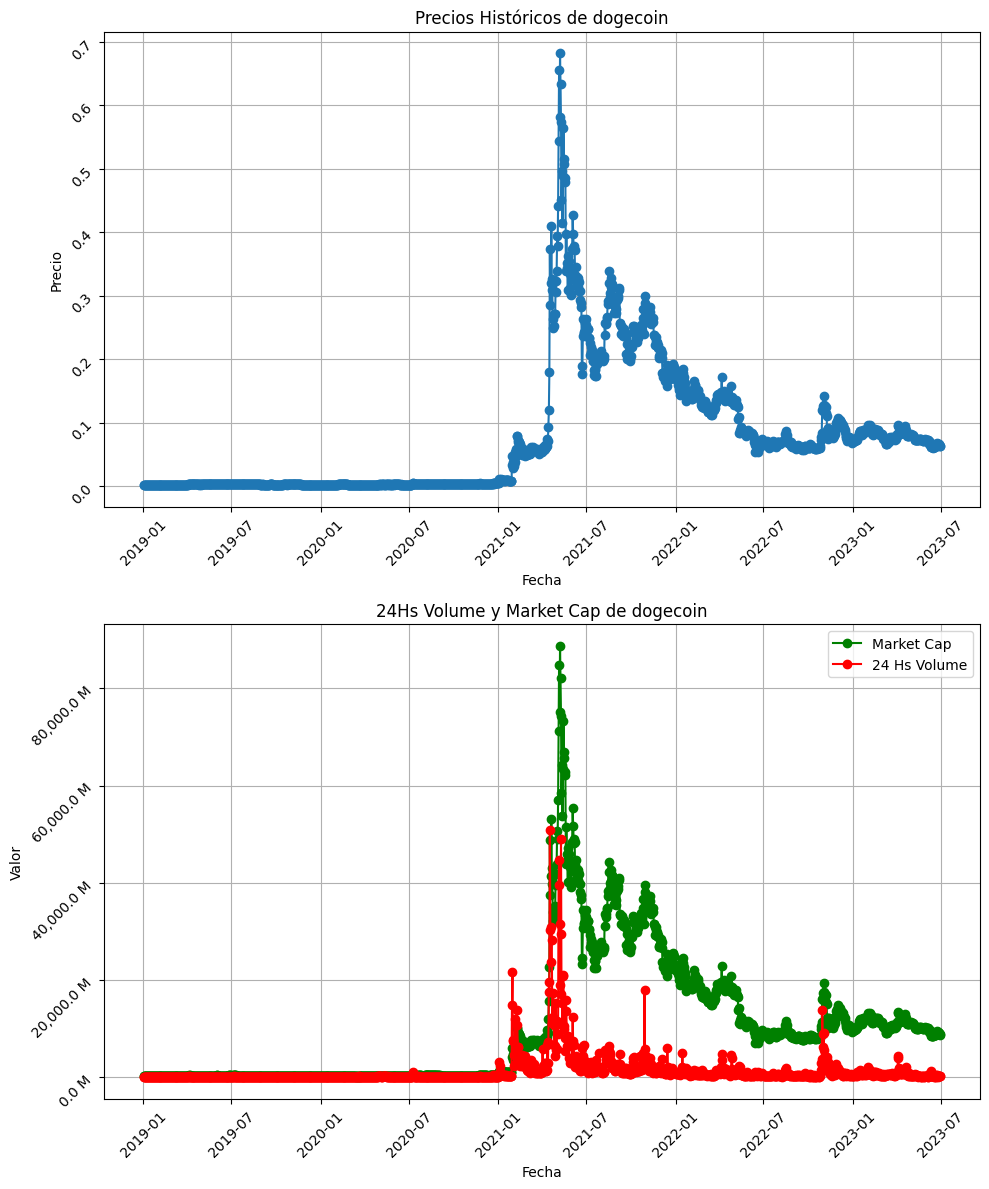

In [371]:
# Filtrar solo los datos de dogecoin
df_dogecoin = df_final[df_final['ID'] == 'dogecoin']

# Convertir la columna de Fechas a un formato de Fecha
df_dogecoin['Fecha'] = pd.to_datetime(df_dogecoin['Fecha'])

# Ordenar los datos por Fecha
df_dogecoin = df_dogecoin.sort_values('Fecha')


# Función para formatear los valores del eje y en millones con separadores de miles
def millions_formatter(x, pos):
    'La función que formatea los valores en millones con separadores de miles'
    return f'{x / 1e6:,.1f} M'

# Crear una figura con dos subplots (2 filas, 1 columna)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Primer subplot: Precios Históricos de dogecoin
axs[0].plot(df_dogecoin['Fecha'], df_dogecoin['Precio_USD'], marker='o')
axs[0].set_title('Precios Históricos de dogecoin')
axs[0].set_xlabel('Fecha')
axs[0].set_ylabel('Precio')
axs[0].grid(True)
axs[0].tick_params(rotation=45)

# Segundo subplot: Precios Históricos y Market Cap de dogecoin
axs[1].plot(df_dogecoin['Fecha'], df_dogecoin['Market_Cap'], marker='o', label='Market Cap', color='green')
axs[1].plot(df_dogecoin['Fecha'], df_dogecoin['24h_Volume'], marker='o', label='24 Hs Volume', color='red')
axs[1].set_title('24Hs Volume y Market Cap de dogecoin')
axs[1].set_xlabel('Fecha')
axs[1].set_ylabel('Valor')
axs[1].grid(True)
axs[1].tick_params(rotation=45)


# Configurar el formateador personalizado para el eje y del segundo subplot
axs[1].yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Agregar una leyenda
plt.legend()

# Mostrar los gráficos
plt.show()

solana

/var/folders/rl/4_3j3kb90d74wbdrz3mdbvn00000gn/T/ipykernel_73784/3997526538.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



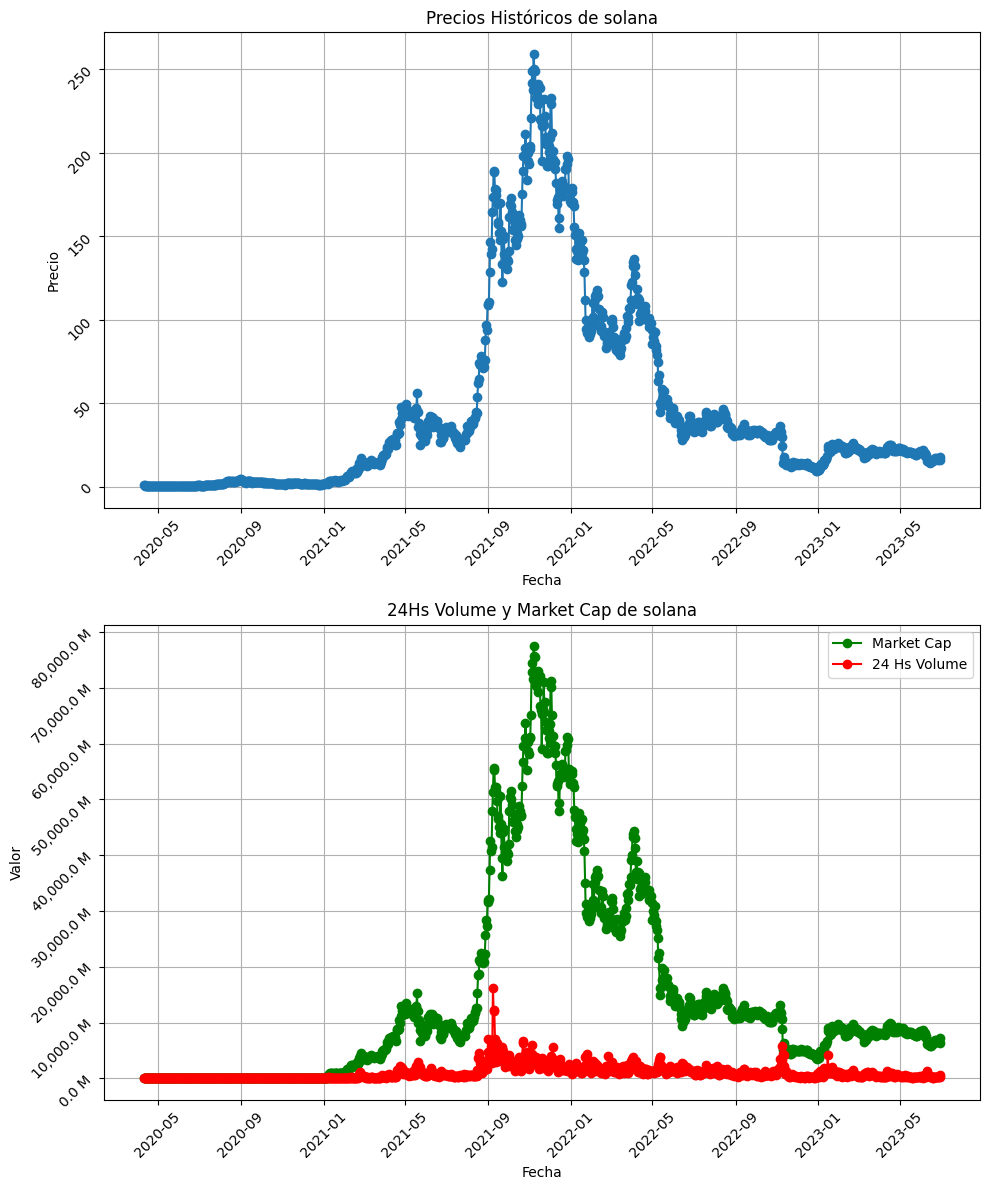

In [372]:
# Filtrar solo los datos de solana
df_solana = df_final[df_final['ID'] == 'solana']

# Convertir la columna de Fechas a un formato de Fecha
df_solana['Fecha'] = pd.to_datetime(df_solana['Fecha'])

# Ordenar los datos por Fecha
df_solana = df_solana.sort_values('Fecha')


# Función para formatear los valores del eje y en millones con separadores de miles
def millions_formatter(x, pos):
    'La función que formatea los valores en millones con separadores de miles'
    return f'{x / 1e6:,.1f} M'

# Crear una figura con dos subplots (2 filas, 1 columna)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Primer subplot: Precios Históricos de solana
axs[0].plot(df_solana['Fecha'], df_solana['Precio_USD'], marker='o')
axs[0].set_title('Precios Históricos de solana')
axs[0].set_xlabel('Fecha')
axs[0].set_ylabel('Precio')
axs[0].grid(True)
axs[0].tick_params(rotation=45)

# Segundo subplot: Precios Históricos y Market Cap de solana
axs[1].plot(df_solana['Fecha'], df_solana['Market_Cap'], marker='o', label='Market Cap', color='green')
axs[1].plot(df_solana['Fecha'], df_solana['24h_Volume'], marker='o', label='24 Hs Volume', color='red')
axs[1].set_title('24Hs Volume y Market Cap de solana')
axs[1].set_xlabel('Fecha')
axs[1].set_ylabel('Valor')
axs[1].grid(True)
axs[1].tick_params(rotation=45)


# Configurar el formateador personalizado para el eje y del segundo subplot
axs[1].yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Agregar una leyenda
plt.legend()

# Mostrar los gráficos
plt.show()

En los graficos anteriores podemos obeservar que se comportan de manera similar en cuanto al precio de mercado (Price_USD) y la Capitalizacion de Mercados (Market_Cap).
La Capitalizacion de Mercado es el valor total de todas las unidades de una criptomoneda multiplicado por su precio actual en el mercado.
Tambien vemos relacion en cuanto al 24Hs Volume que es la cantidad total de la criptomoneda que se ha comprado o vendido en un mercado durante un intervalo de 24 horas. Es una medida que indica la actividad y liquidez de una criptomoneda en un mercado dado.
Un alto volumen total generalmente sugiere una mayor actividad comercial y un interés más fuerte en la criptomoneda. Por otro lado, un bajo volumen total podría indicar menor actividad y menos interés en el mercado.
